# Heart Disease Prediction Using Machine Learning

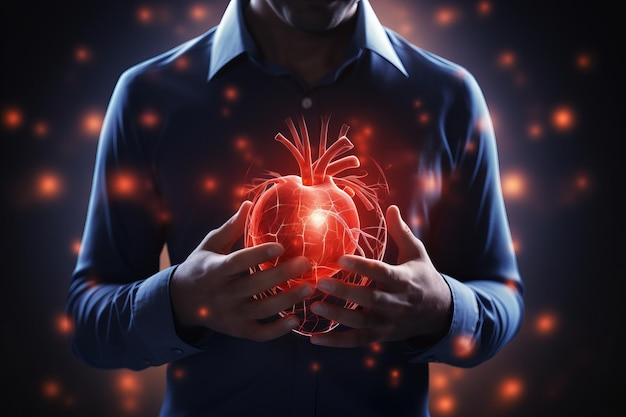

In [2]:
import IPython
IPython.display.Image('https://img.freepik.com/premium-photo/3d-hologram-heart-against-human-silhouette-studying-heart-disease-using-ai-ai-developing-treatments-heart-disease-biotechnology-biomedicine_124865-38704.jpg')

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

# Step 1 : Import Modules

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score #root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns 
import warnings as w
w.filterwarnings('ignore')
print("Modules Loaded Successfully!")

Modules Loaded Successfully!


# Step 2 : Loading Data

In [4]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


# Step 3 : Understanding data using EDA 


##### 3.1 Data head

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### 3.2 data tail

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


##### 3.3 data Shape

In [7]:
df.shape

(303, 14)

##### 3.4 data information

In [8]:
df.shape

(303, 14)

##### 3.5 data columns

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [10]:
#Domain knowledge is required for this level of project 

###### 3.7 Checking Null value 

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### 3.8 Column data

In [12]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


###### 3.9 Each column univariate Analysis

In [13]:
for i in df:
    print(f"column_(i)",df[i].unique())
    print('==================',end = '\n\n')

column_(i) [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

column_(i) [1 0]

column_(i) [3 2 1 0]

column_(i) [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

column_(i) [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 16

##### 3.10 Each Numerical Feature hist plot Distribution

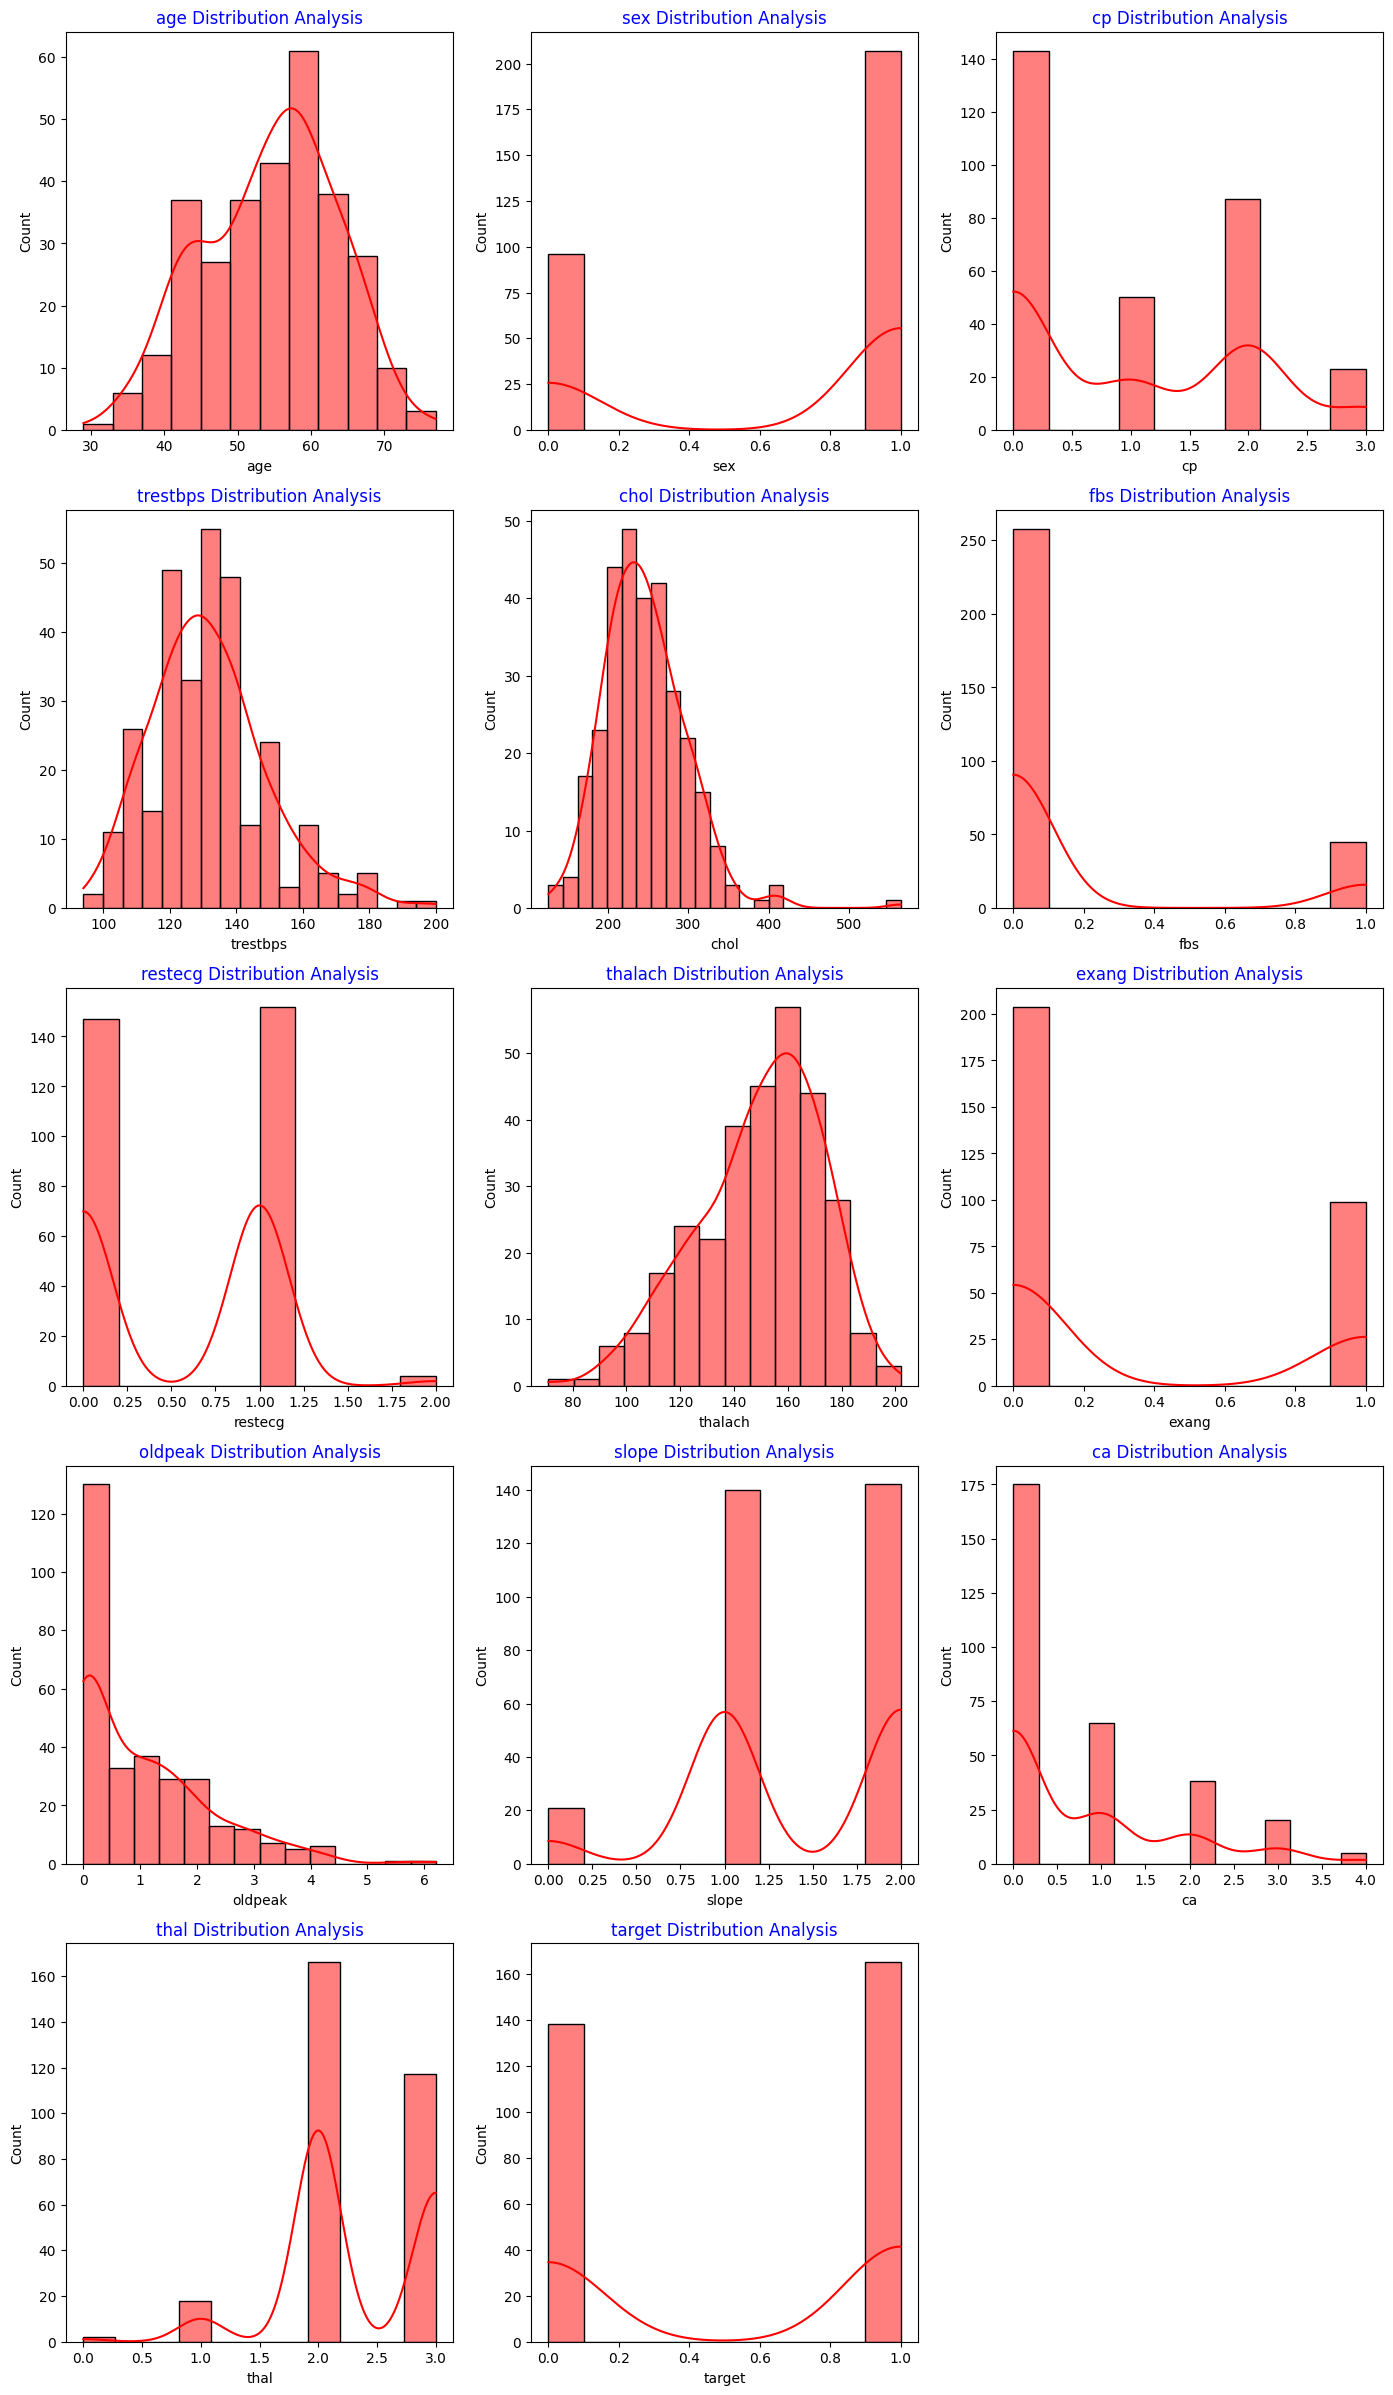

In [14]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j],kde = True,color = 'r')

plt.savefig('All Numerical Features Analysis.jpeg',dpi = 500)
plt.show()


###### 3.11 Bivariate Anaylsis 

In [15]:
# Target col not that much imbalance, we can proceed, if imbalance found we need to balance using sampling

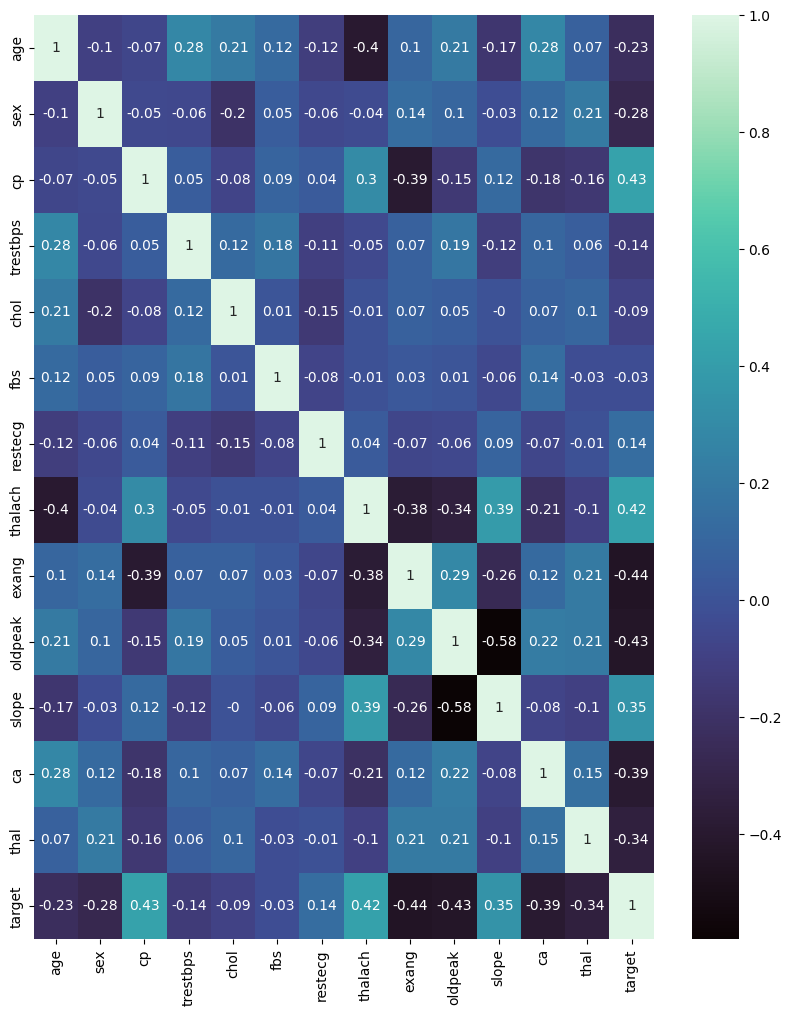

In [16]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot = True)
plt.show()

In [17]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)

In [18]:
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease

In [19]:
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

In [20]:
# 3.12: Target vs Features
df.corr()['target'].sort_values(ascending = False).reset_index()


,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


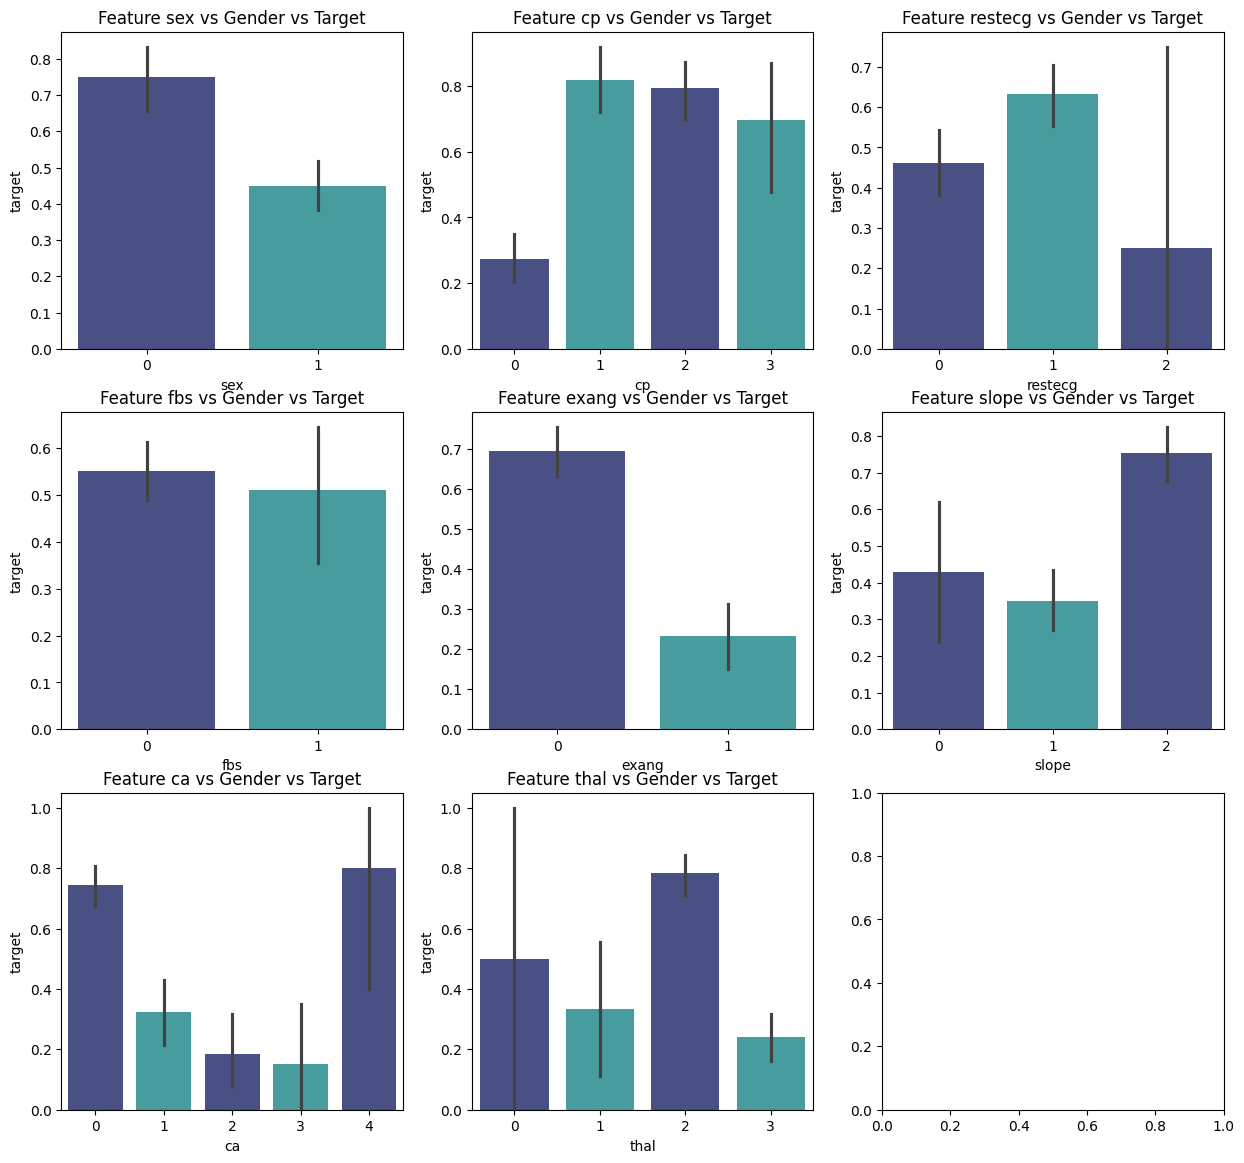

In [21]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
    except:
        ...


plt.show()

    
    

##### 3.13 PAIRPLOT FEATURES VS TARGET

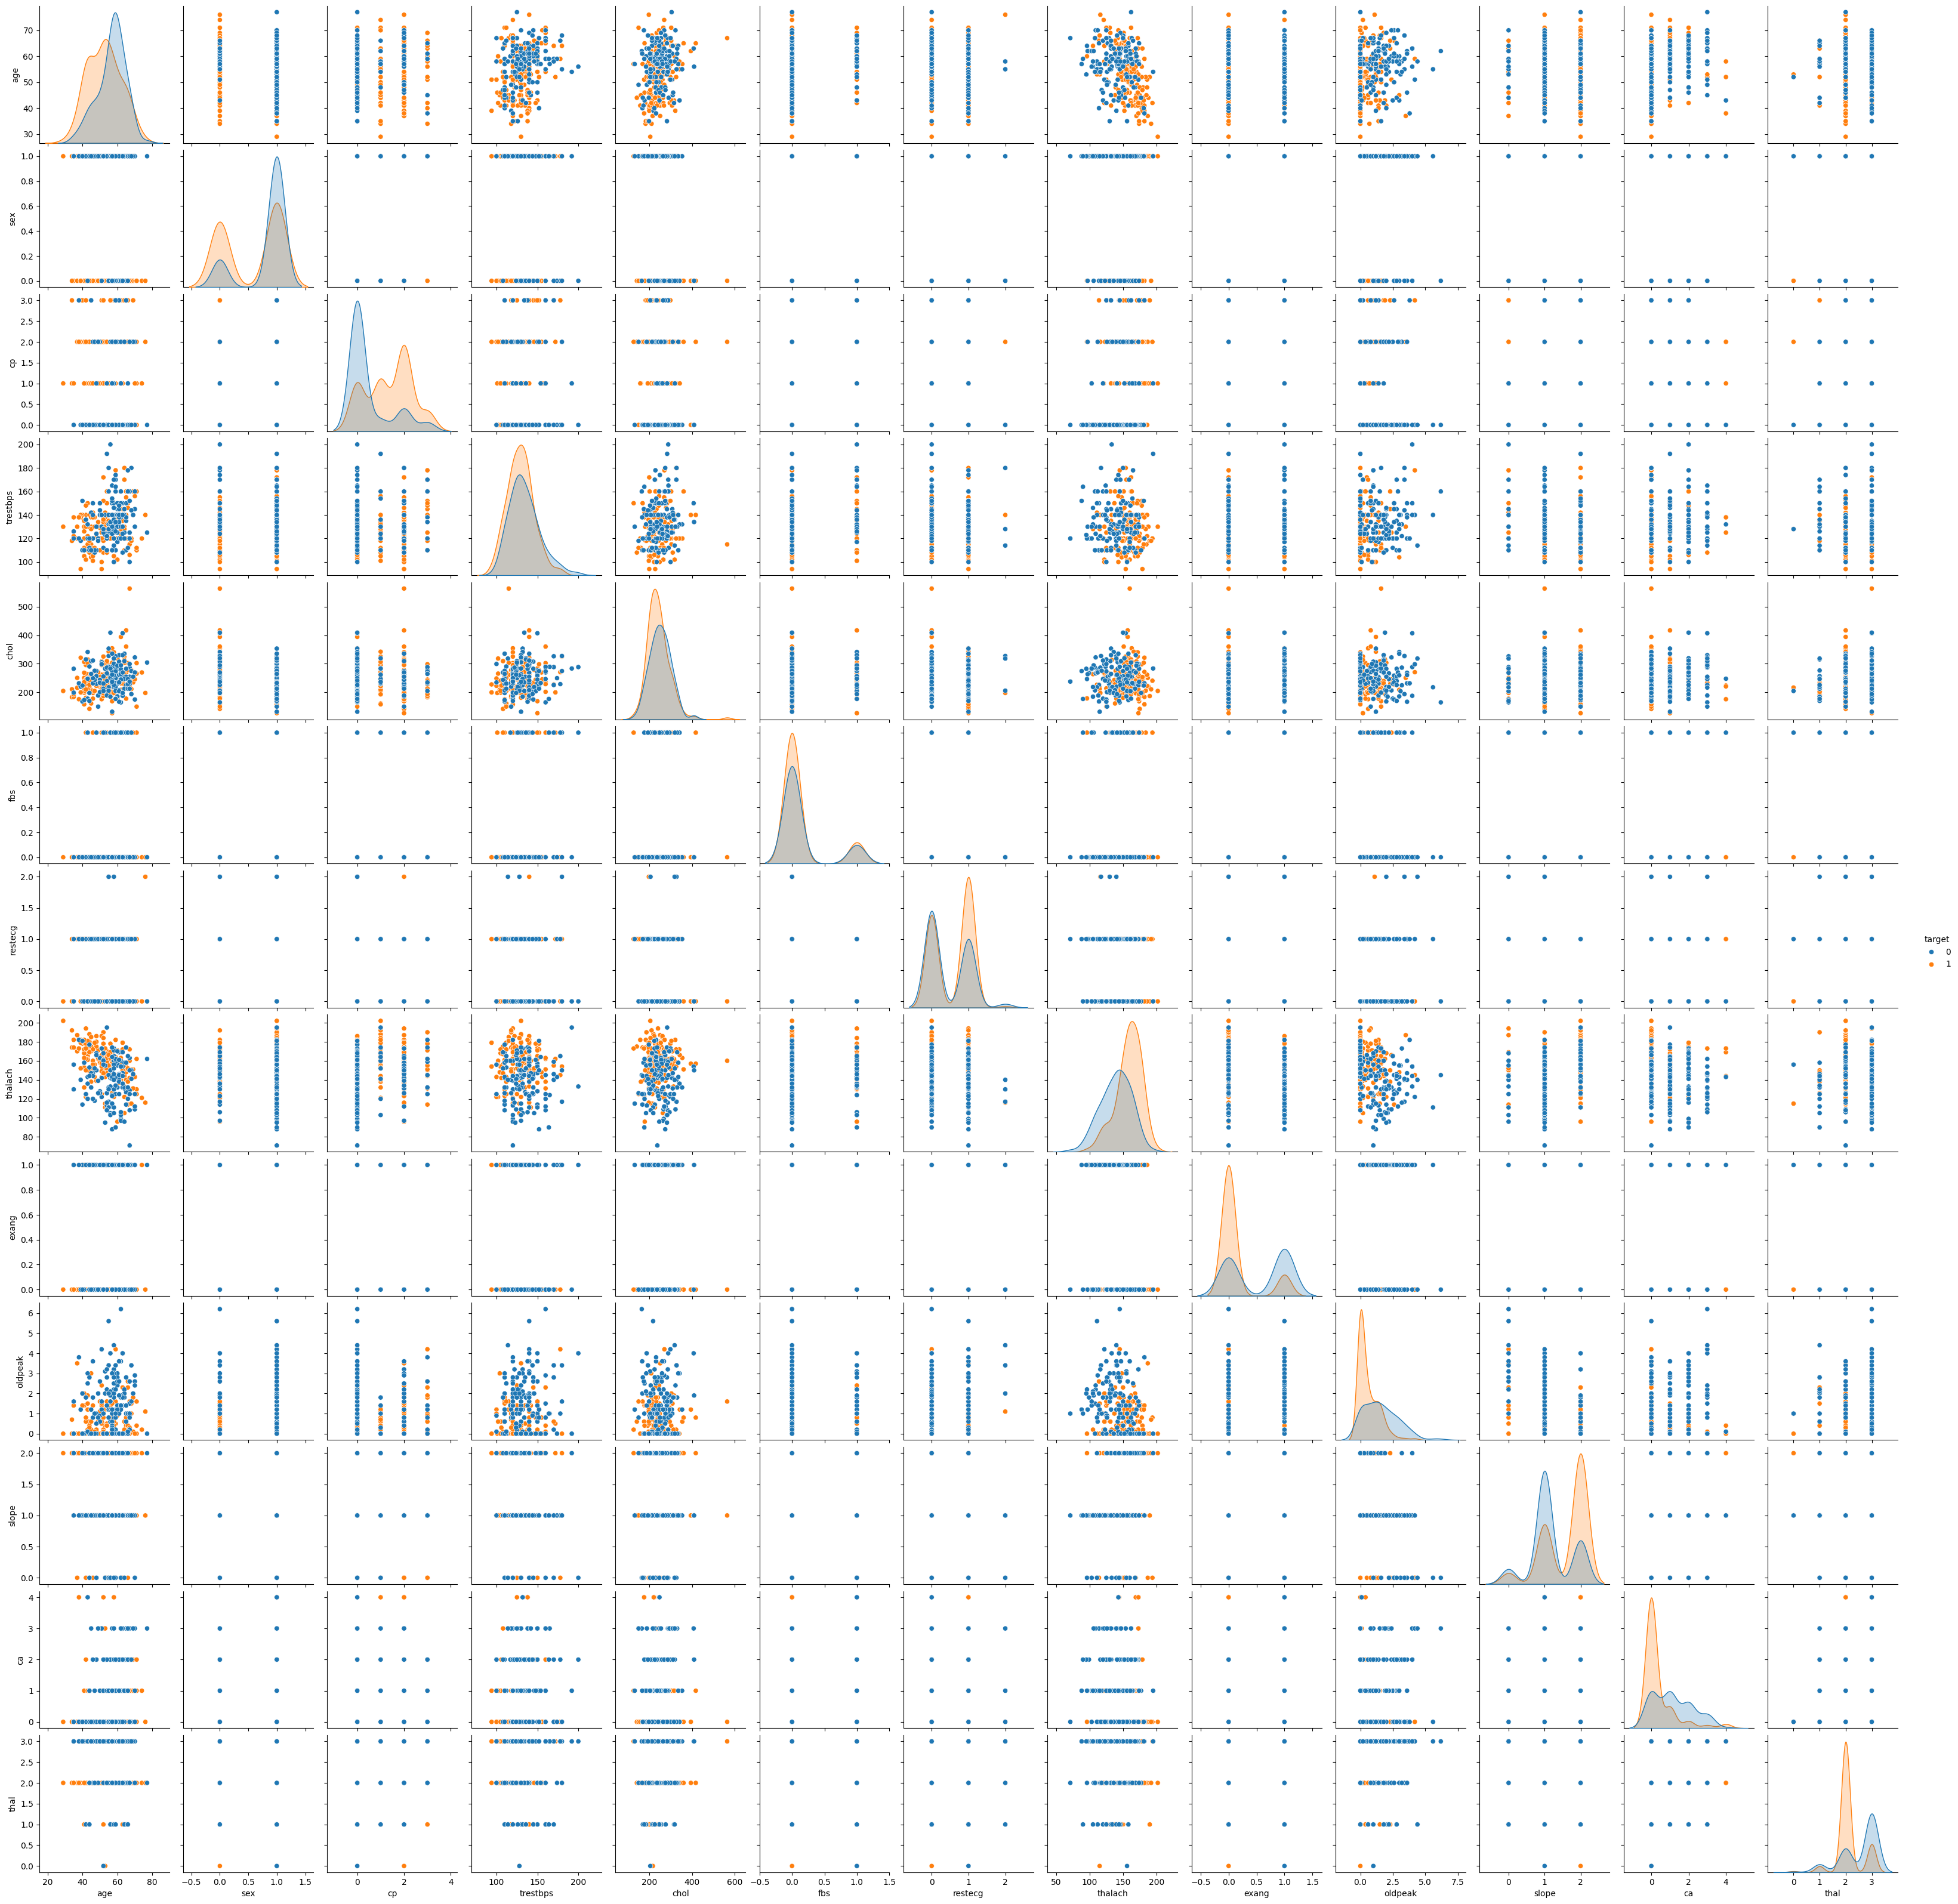

In [22]:
sns.pairplot(data = df,hue = 'target')
plt.show()

# Step 4 : Divide Data into Train and Test

##### Train Test Model

##### 4.1 Divide data into Target and Features

In [23]:

X = df.iloc[:,:-1]
y = df['target']

In [24]:
X.shape,y.shape

((303, 13), (303,))

##### 4.2 Train - test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step 5 : Multi Model Creation

### 5.1 Logistic Regression Model

it used the concept of sigmoid fun :

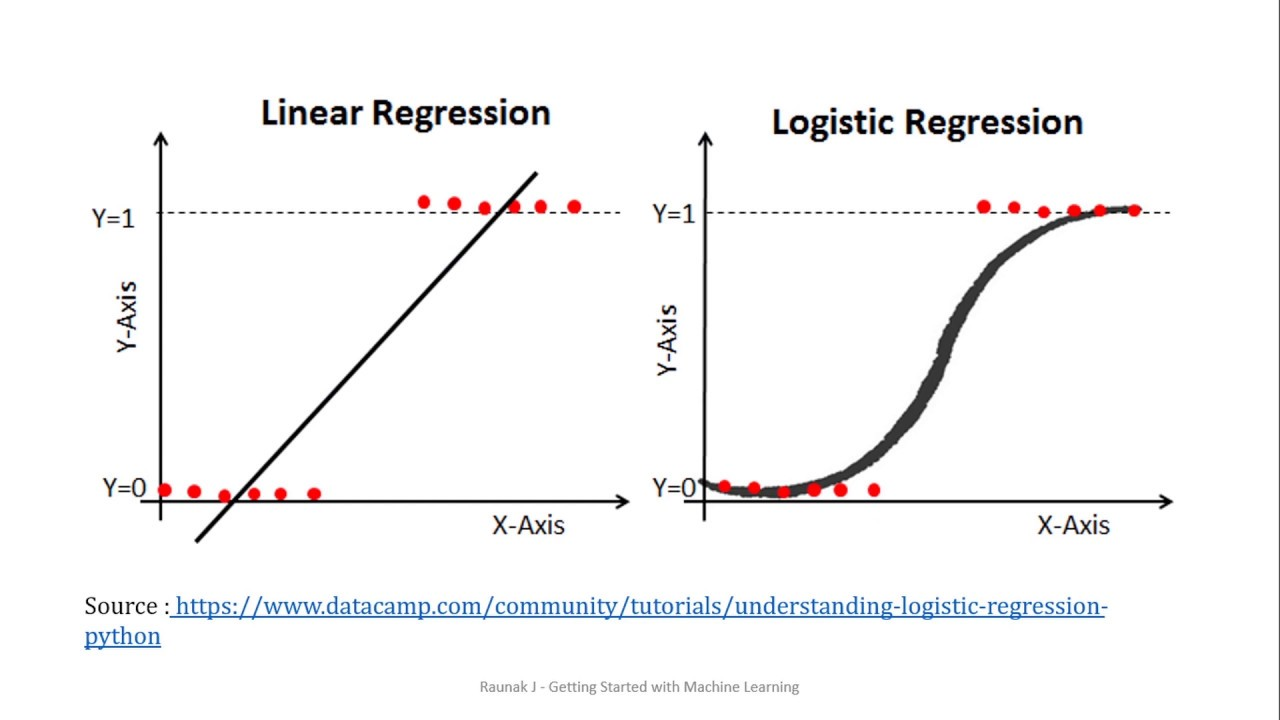

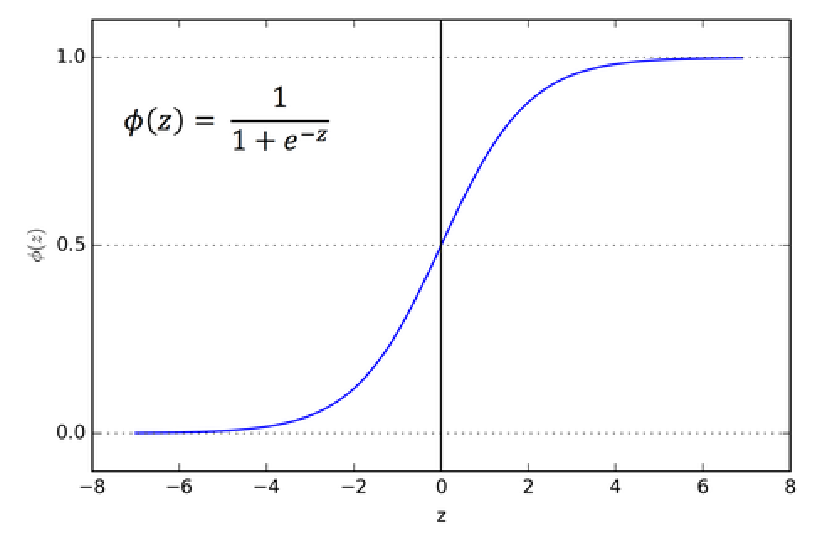

In [27]:
# y_pred = mx+c
# Z = Y_pred


In [28]:
# Logistic regression : we can solve Binary and multiclass classification

In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

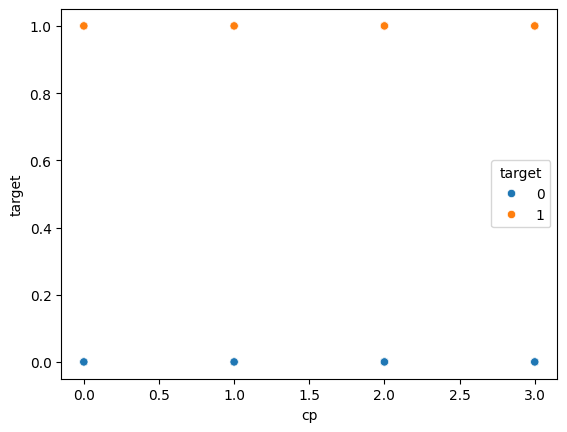

In [30]:
sns.scatterplot(data = df, x = 'cp', y = 'target', hue = 'target')
plt.show()

In [31]:
y_pred = model_lr.predict(X_test)

In [32]:
# 5.1.2: Import model evaluation metrices
# It will be called only when problem is of classification 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

### Confusion Matrix 
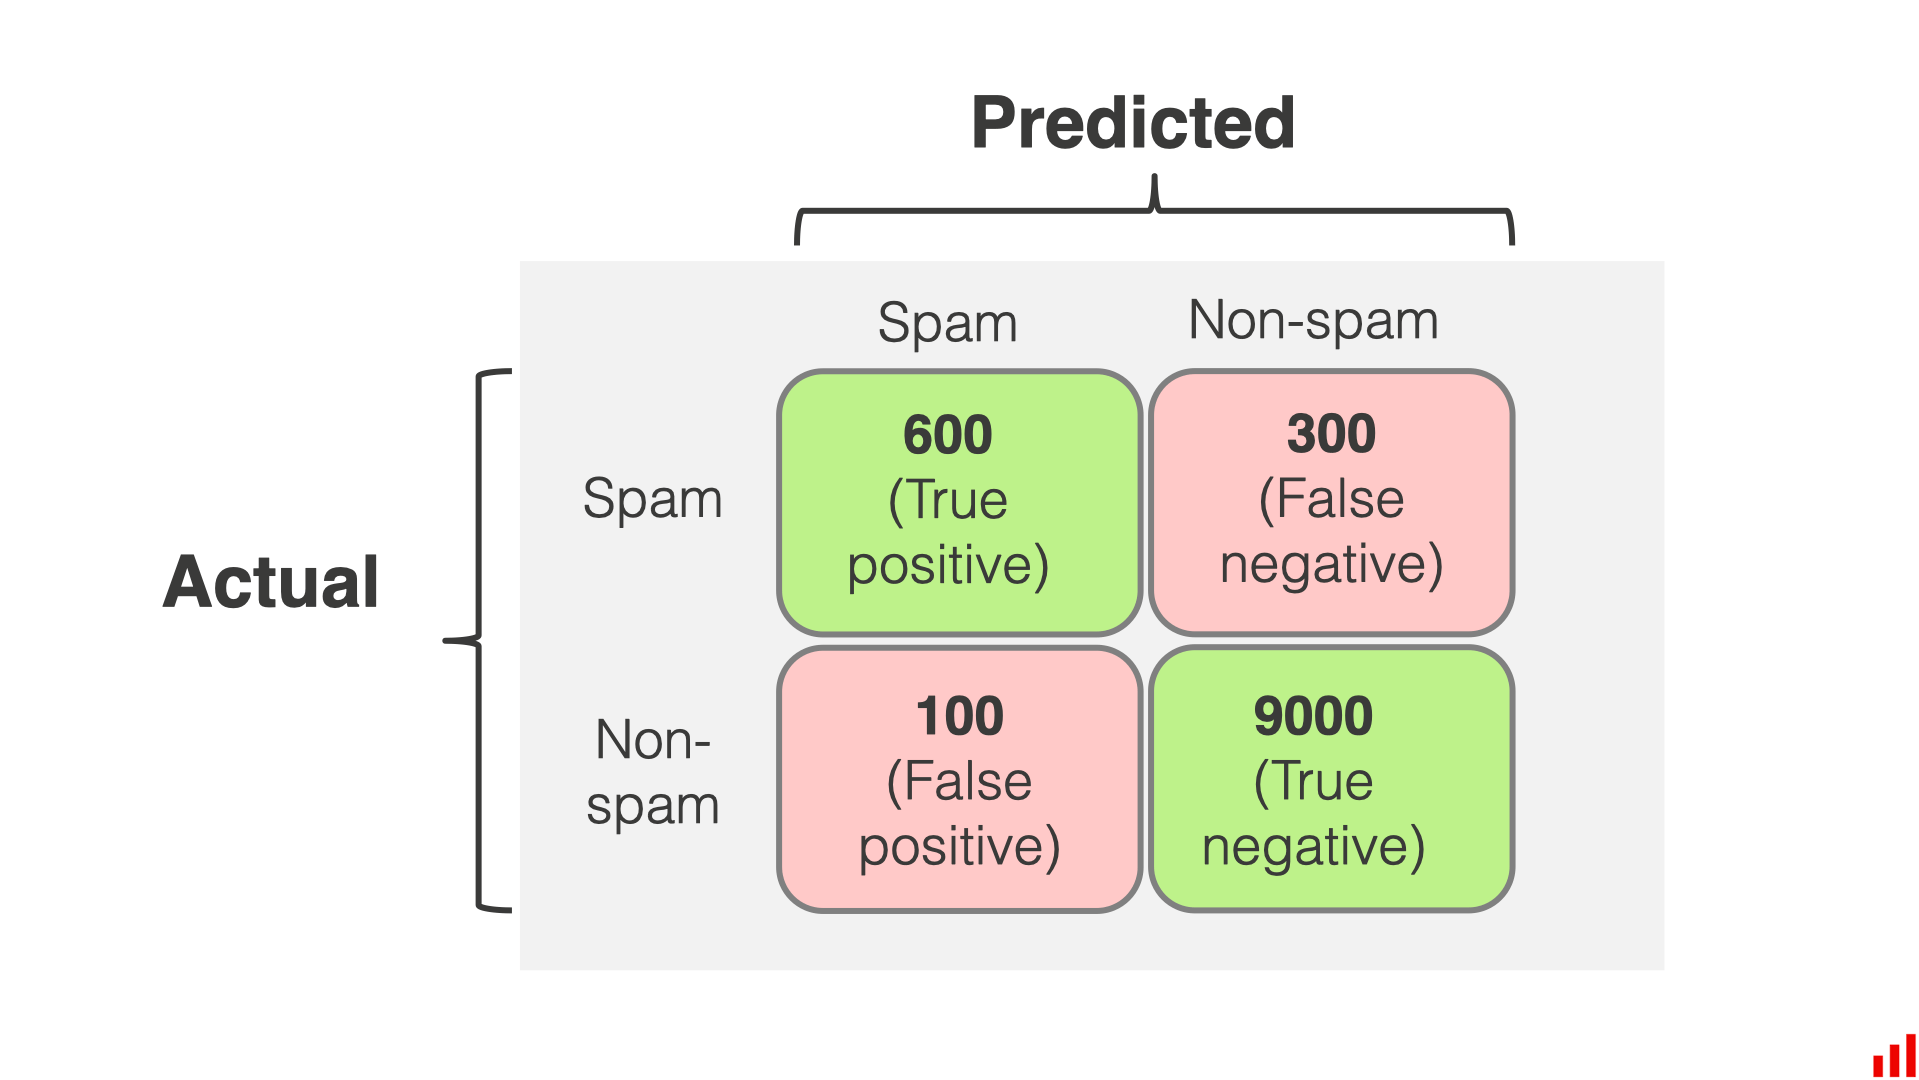


In [33]:
# 5.1.3 Import Confusion Matrix to evaluate classification model

#Error: comparison if score tie 
#Type1,Type2 : Type1 Error danger
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

In [34]:
print(cm)

[[25  4]
 [ 3 29]]


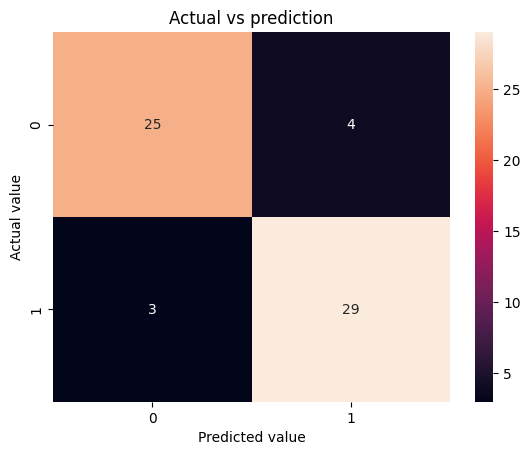

In [35]:
plt.title('Actual vs prediction')
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

In [36]:
pr = 25/29
pr

0.8620689655172413

In [37]:
cm.ravel()

array([25,  4,  3, 29])

In [38]:
TN,FP,FN,TP = cm.ravel()

In [39]:
precision_score(y_test,y_pred)

0.8787878787878788

In [40]:
acs = (TN + TP)/cm.sum() 
print(acs)

0.8852459016393442


In [41]:
print(accuracy_score(y_test,y_pred))

0.8852459016393442


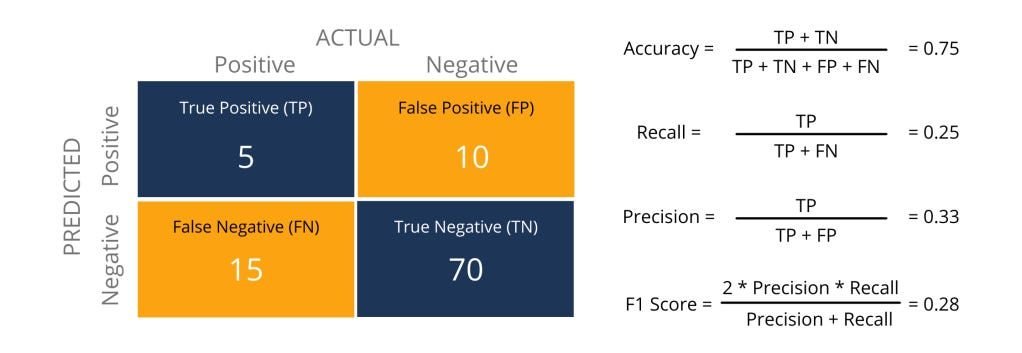

In [42]:
rs = recall_score(y_test,y_pred)
print('Recall Score is: ',rs)

Recall Score is:  0.90625


In [43]:
f1_sc = f1_score(y_test,y_pred)
f1_sc

0.8923076923076924

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [45]:
#5.1.4 checking model score
# Model Score same as accuracy Score
lr_score = model_lr.score(X_test,y_test) 
lr_score

0.8852459016393442

## Step 5.2 : Naive Byes ML model

In [46]:
#pre_assumption : It will pre assume to correlation b/w features

In [47]:
from sklearn.naive_bayes import GaussianNB
#GaussianNB only be use in case a binary classification

model_nv = GaussianNB()
model_nv.fit(X_train,y_train)

GaussianNB()

In [48]:
y_pred = model_nv.predict(X_test)

In [49]:
mv_score = model_nv.score(X_test,y_test)
print("Naive bayes score",mv_score)

Naive bayes score 0.8688524590163934


In [50]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8688524590163934
Precision Score:  0.9
Recall Score:  0.84375
F1 Score:  0.8709677419354839


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



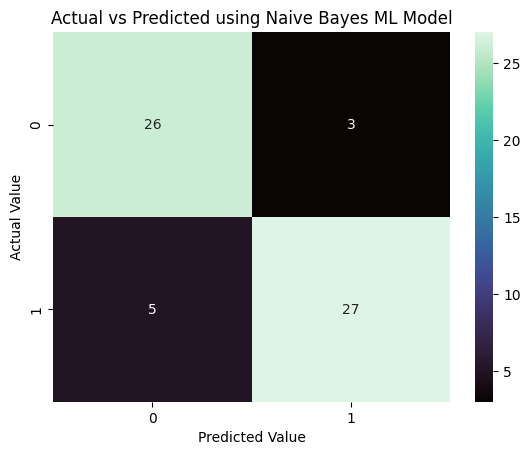

In [52]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [53]:
# Model1>Y_pred>Scores>confusionMatrix>classification_report
# Model2>Y_pred>Scores>confusionMatrix>classification_report
# Model3>Y_pred>Scores>confusionMatrix>classification_report
# Model4>Y_pred>Scores>confusionMatrix>classification_report
# Model5>Y_pred>Scores>confusionMatrix>classification_report
# Model6>Y_pred>Scores>confusionMatrix>classification_report
# best Model Save: Error(low), Accuracy Score

### Step 5.3 : Support vector machine (SVM)

In [54]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

In [55]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

#### Step 5.3.2 : Predict X_test

In [56]:
y_pred = model_svc.predict(X_test)

In [57]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



In [59]:
confusion_matrix(y_test,y_pred)

array([[15, 14],
       [ 4, 28]])

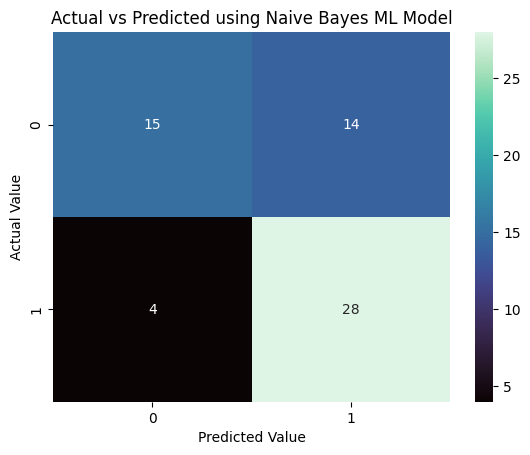

In [60]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [61]:
svm_score = accuracy_score(y_test,y_pred)

In [62]:
lr_score,mv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

# Step 5.4 : Decision Tree ML Model

In [63]:
# sepal length ,sepal width, petal lenght ,petal width 

# Iris Versilcolor, Iris Setosa, Iris Virginica

In [64]:
# based on 4 features
# Decision TREE petal width

In [65]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = model_dt.predict(X_test)

In [67]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.7868852459016393
Precision Score:  0.88
Recall Score:  0.6875
F1 Score:  0.7719298245614035


In [68]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.7868852459016393

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



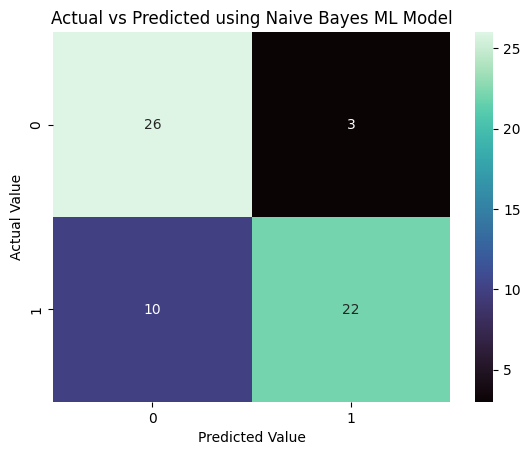

In [70]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [71]:
from sklearn.tree import plot_tree

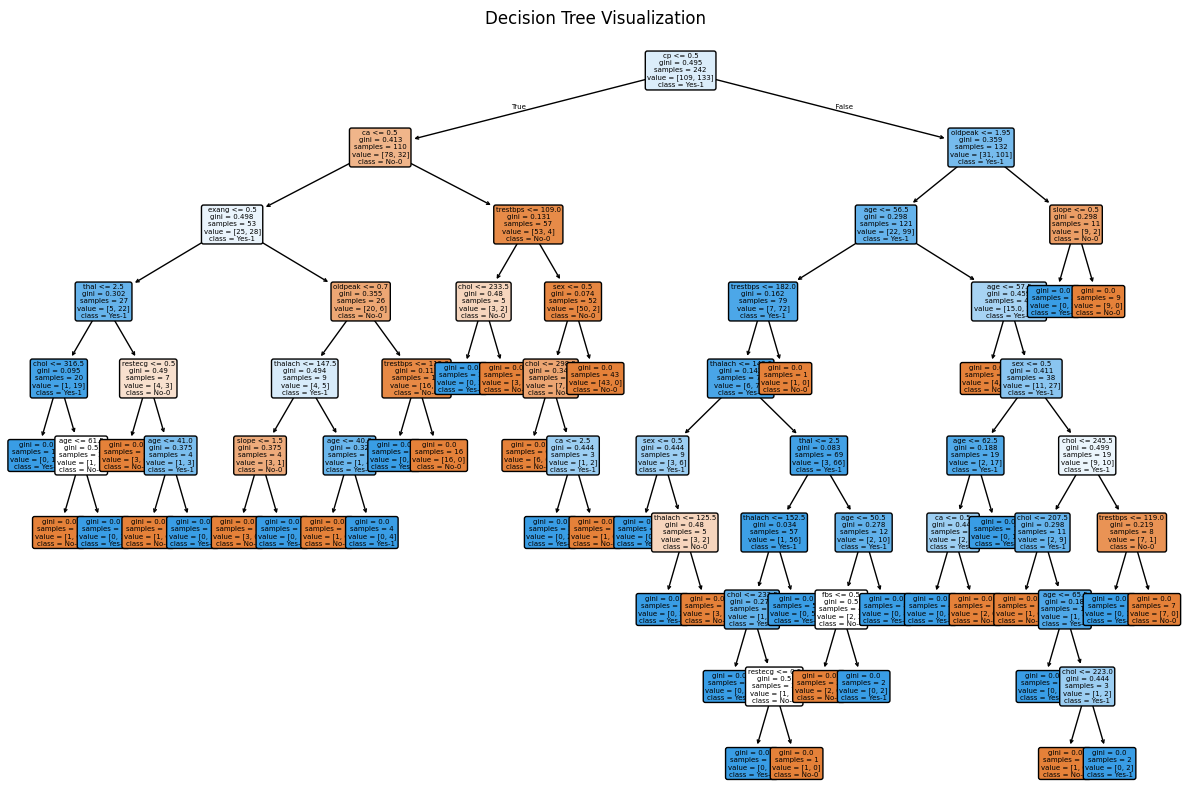

In [72]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

### Step 5.5 : Ensembles ML Model
- Bagging Technique: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority
- Boosting Technique: Next model learn from previous model and boost it minimize error to improve score


In [73]:
# Bagging Technique 
# Boosting Technique 

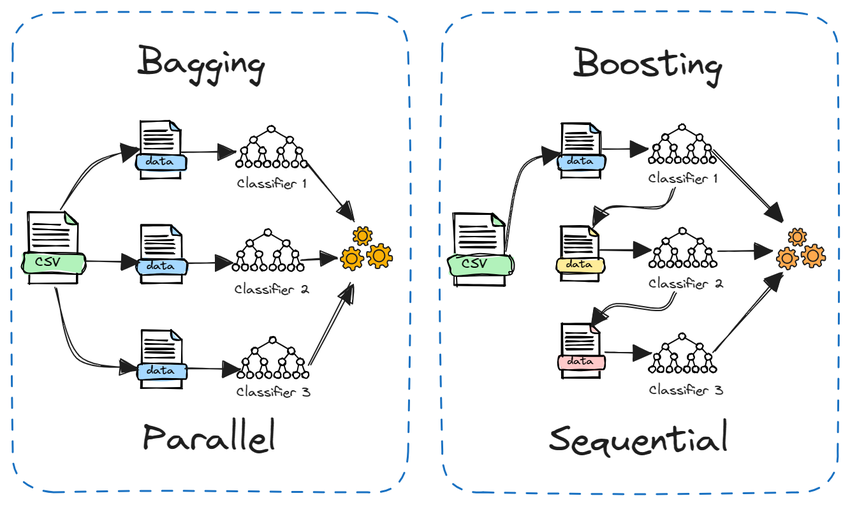

## Step 5.5.1 : Bagging Technique Model>> Random Forest ML Model

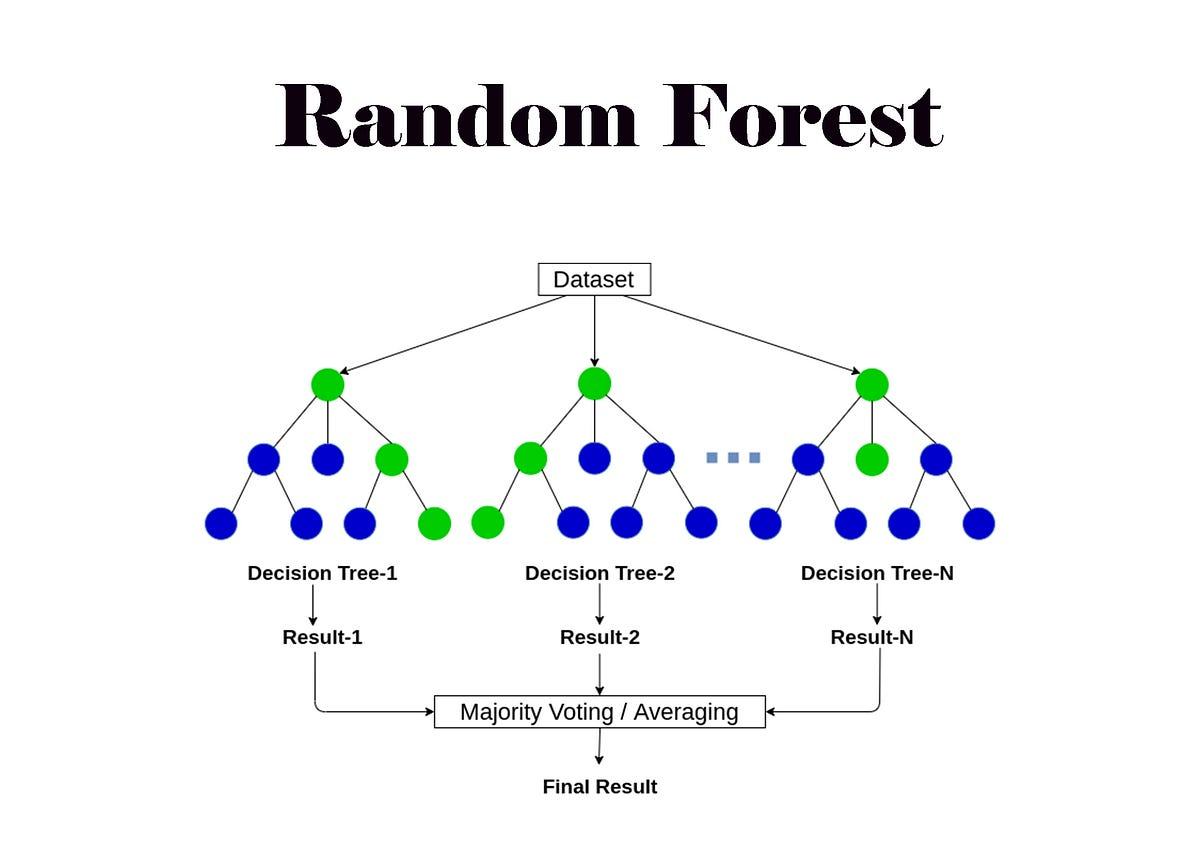

In [74]:
# Random Forest regression gradient : Avg of Final value  

### step 5.5.2 : import Random Forest 

In [75]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200)

model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

### step 5.5.3 : y_pred prediction based on X_test

In [76]:
y_pred = model_rf.predict(X_test)

In [77]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.8360655737704918
Precision Score:  0.84375
Recall Score:  0.84375
F1 Score:  0.84375


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



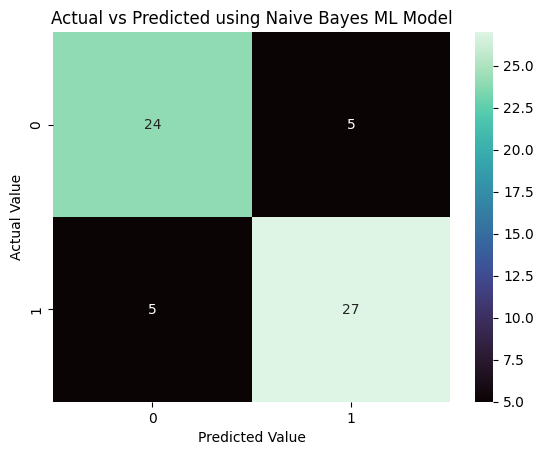

In [79]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.6 : Ensemble Boosting Tehcnique : Adaboost, Gradientboost , XGboost

In [80]:
# Adaboost : Adaptive Boosting 
# Gradientboost : GBM
# LBM : GradientBoost : LGBM
# XGboost : Extreme Gradient Boosting 
#Catboost : Categorical : textual data 

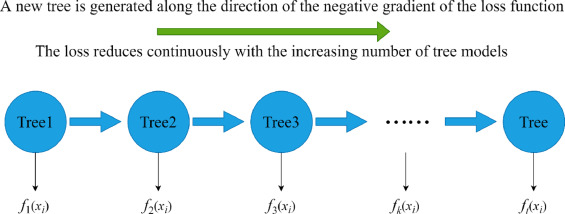

In [81]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import xgboost 
print("done")

done


In [83]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
y_pred = model_xgb.predict(X_test)

In [85]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.819672131147541
Precision Score:  0.8620689655172413
Recall Score:  0.78125
F1 Score:  0.819672131147541


In [86]:
xgb_score = accuracy_score(y_test,y_pred)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### Step 5.7 KNN : Regression and Classification 

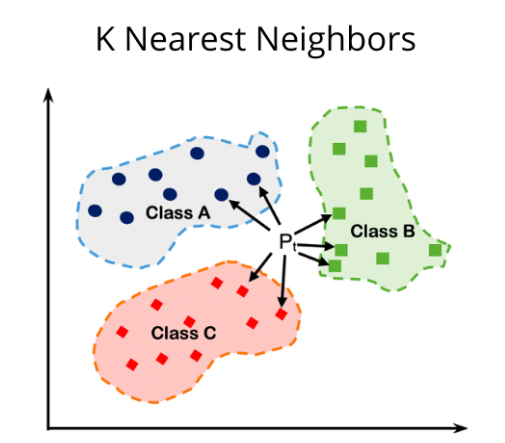

#### 5.7.1 import KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=14)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [89]:
y_pred = model_KNN.predict(X_test)

In [90]:
knn_score = accuracy_score(y_test,y_pred)

In [91]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.7377049180327869
Precision Score:  0.7666666666666667
Recall Score:  0.71875
F1 Score:  0.7419354838709677


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



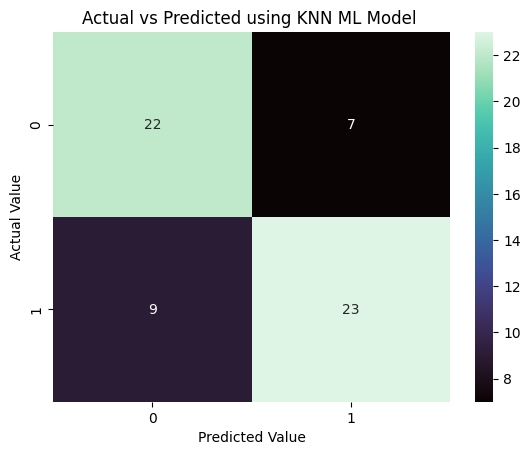

In [93]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using KNN ML Model ')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.8 : Artificial Neural Network Using Deep Learning

In [94]:
# ML works Only on limited data 
# if input Changes ML Model fail(8 Features col = 8)

In [95]:
#Deep Learning :

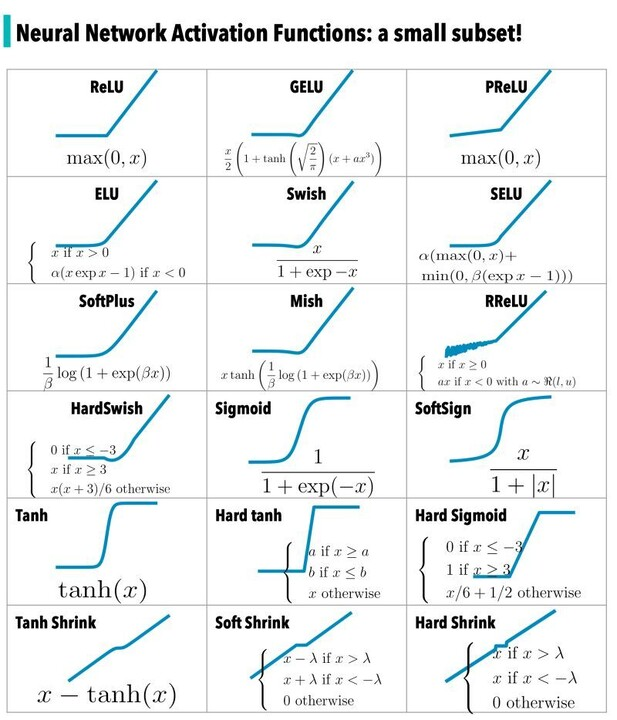

#### Step 5.8.1 ANN Model Creation

In [96]:
# pip install keras

In [97]:
# pip install tensorflow

In [98]:
from keras.models import Sequential
from keras.layers import Dense
print("done")

done


In [99]:
#5.8.2 
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


In [100]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4504 - loss: 46.0608
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4504 - loss: 36.8178 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4504 - loss: 27.4690 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4504 - loss: 18.4979
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4463 - loss: 9.2359 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5124 - loss: 3.1616 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5620 - loss: 3.3914
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5620 - loss: 3.0157 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5372 - loss: 2.5227 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5372 - loss: 2.4336 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5620 - loss: 2.2591
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 

In [101]:
y_pred = model.predict(X_test)
y_pred = [round(i[0]) for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]


In [102]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8852459016393442

# Step 6 : All Model Comparison 

In [103]:
all_model_score = [lr_score,mv_score,svm_score,dt_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','XGB','Knn','ANN']

print('Done')

Done


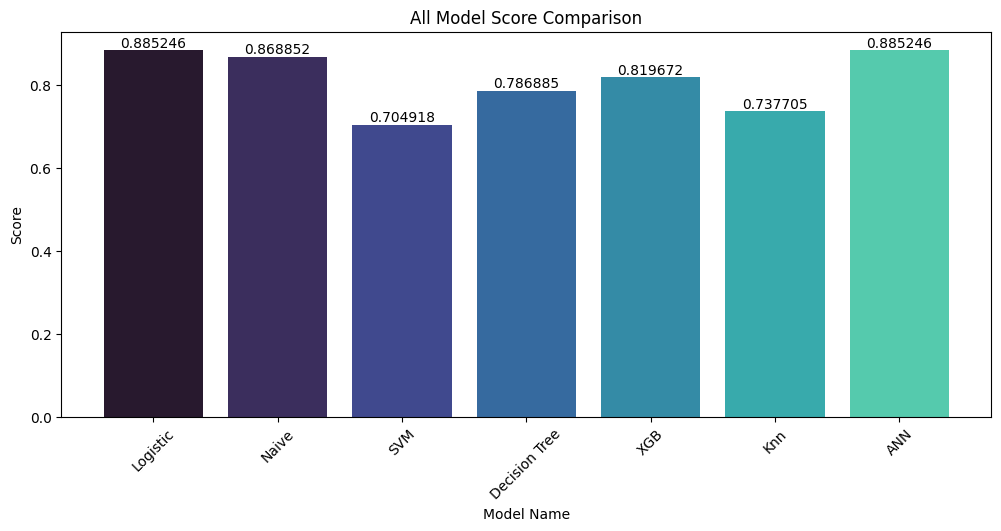

In [104]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# Step 7 : Best Model SAVE

In [106]:
import pickle 
with open('heart_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done
